

```
# This is formatted as code
```

### Connect to gdrive

In [15]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Using the Colab notebook, import the following packages/ libraries/ modules:

**OS**

In [16]:
import os as os

**Numpy**

In [17]:
import numpy as np

**Pandas**

In [18]:
import pandas as pd

**Matplotlib**

In [19]:
import matplotlib.pyplot as plt

**Seaborn**

In [20]:
import seaborn as sns

**Warnings (to suppress warnings)**

In [21]:
import warnings as wn

### Import and load the dataset. Set the client_id as the index.

In [22]:
path = "/content/drive/MyDrive/Colab Notebooks/Datasets/loans.csv"
df = pd.read_csv(path)
df.set_index('client_id', inplace = True)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Display the contents of the dataset by showing its first 5 rows.

In [24]:
df.head(5)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


### Check the info of the dataset and the datatypes for each columns.

  ### Determine whether the dataset has missing values.

In [26]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

### Check if there is a presence of outliers using Boxplot.

**Exclude Objects**

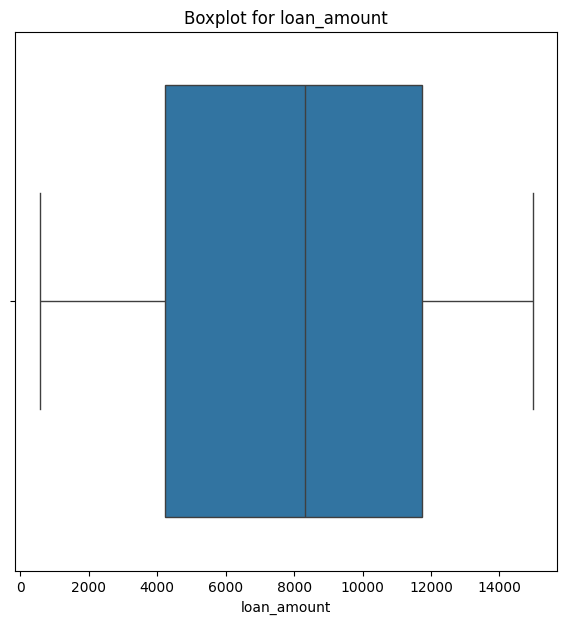

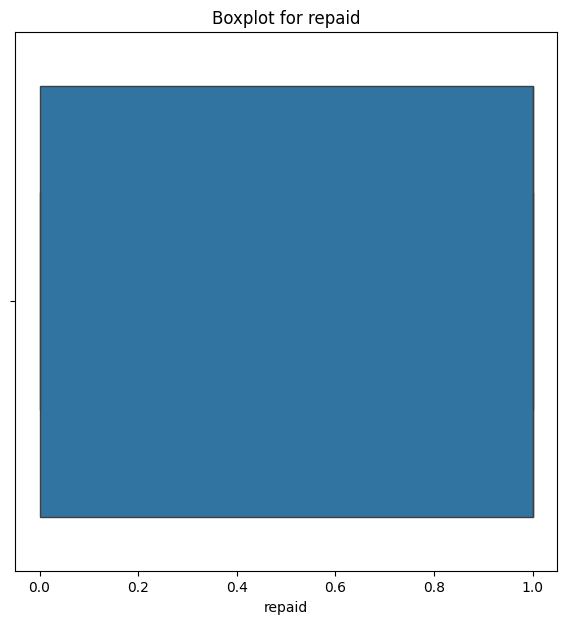

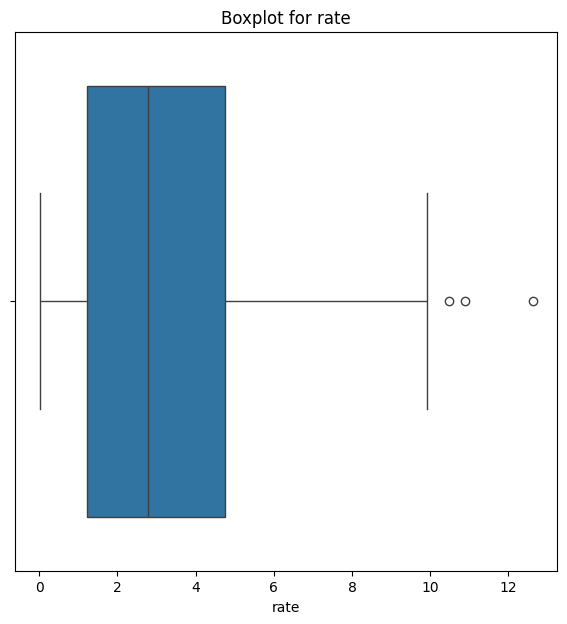

In [44]:
numeric_columns = ['loan_amount', 'repaid', 'rate']

for col in numeric_columns:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### If there are a presence of outliers, do the following and explain the results:

**a. Treat them using SQRT transformation**

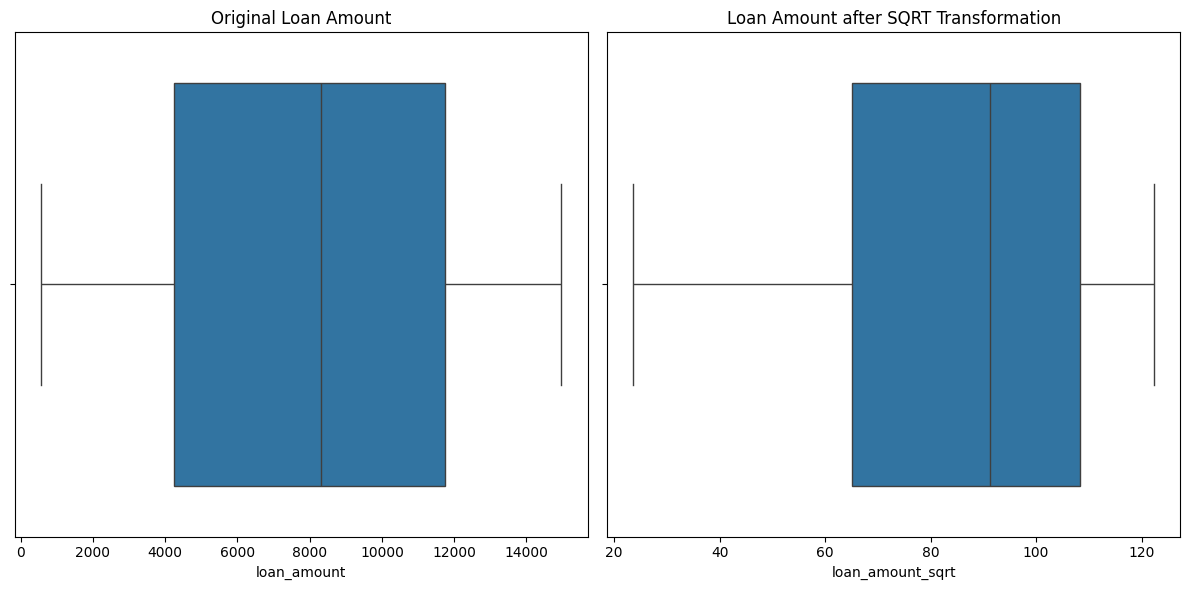

In [28]:
# Assuming df is your DataFrame
numeric_columns = ['loan_amount']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['loan_amount_sqrt'] = np.sqrt(df['loan_amount'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['loan_amount'])
plt.title('Original Loan Amount')

# Square root transformed data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sqrt_transformed['loan_amount_sqrt'])
plt.title('Loan Amount after SQRT Transformation')

plt.tight_layout()
plt.show()

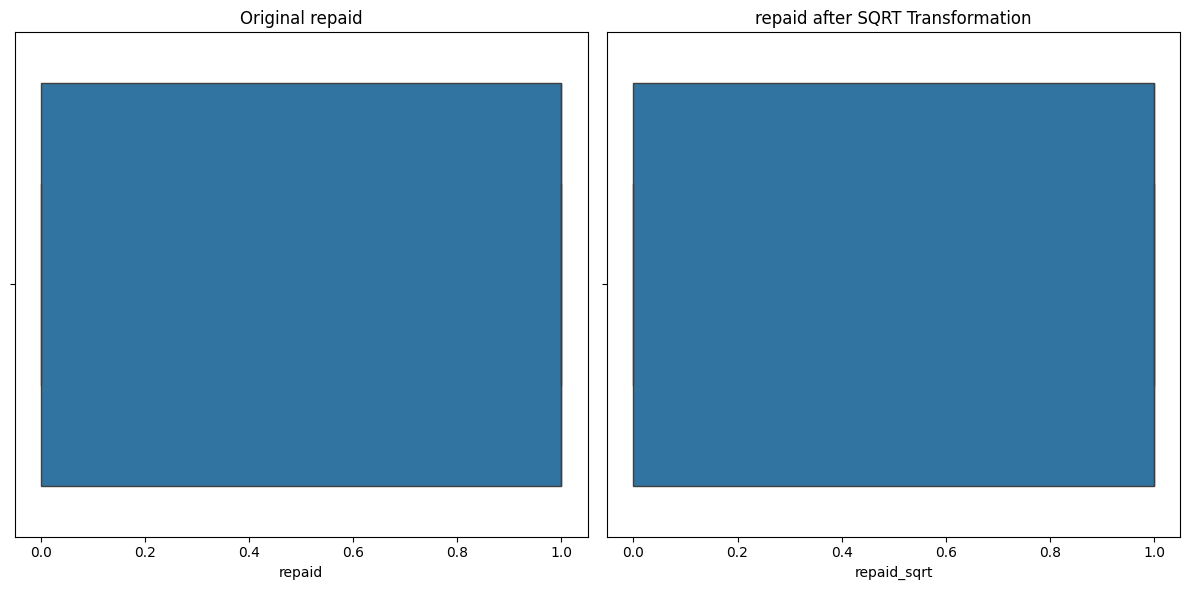

In [29]:
# Assuming df is your DataFrame
numeric_columns = ['repaid']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['repaid_sqrt'] = np.sqrt(df['repaid'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['repaid'])
plt.title('Original repaid')

# Square root transformed data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sqrt_transformed['repaid_sqrt'])
plt.title('repaid after SQRT Transformation')

plt.tight_layout()
plt.show()

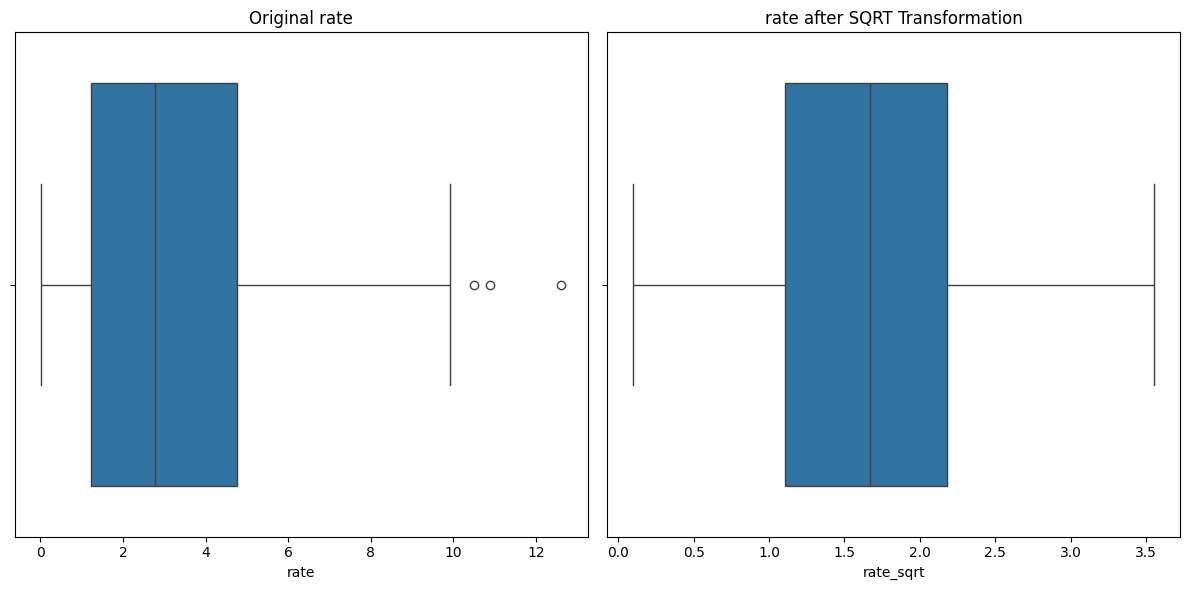

In [30]:
# Assuming df is your DataFrame
numeric_columns = ['rate']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['rate_sqrt'] = np.sqrt(df['rate'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['rate'])
plt.title('Original rate')

# Square root transformed data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sqrt_transformed['rate_sqrt'])
plt.title('rate after SQRT Transformation')

plt.tight_layout()
plt.show()

**b. Treat them using the capping approach: Z-Score.**




In [31]:
from scipy.stats import zscore

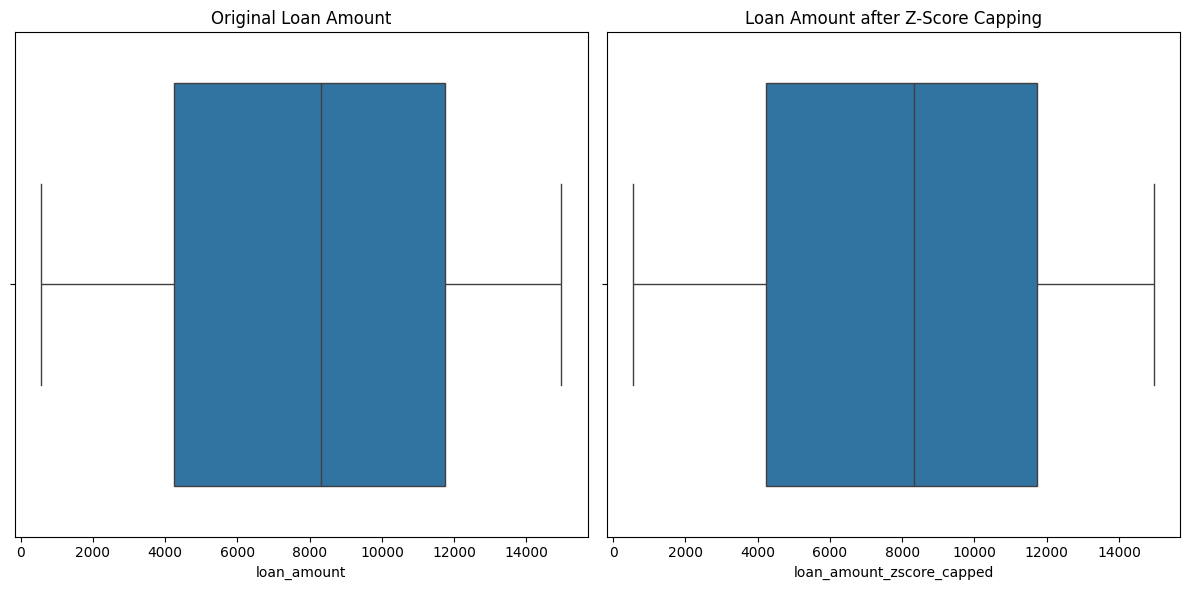

In [32]:
# Assuming df is your DataFrame
numeric_columns = ['loan_amount']

# Calculate z-scores
z_scores = zscore(df['loan_amount'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['loan_amount_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['loan_amount']), df['loan_amount'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['loan_amount'])
plt.title('Original Loan Amount')

# Z-score capped data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore_capped['loan_amount_zscore_capped'])
plt.title('Loan Amount after Z-Score Capping')

plt.tight_layout()
plt.show()

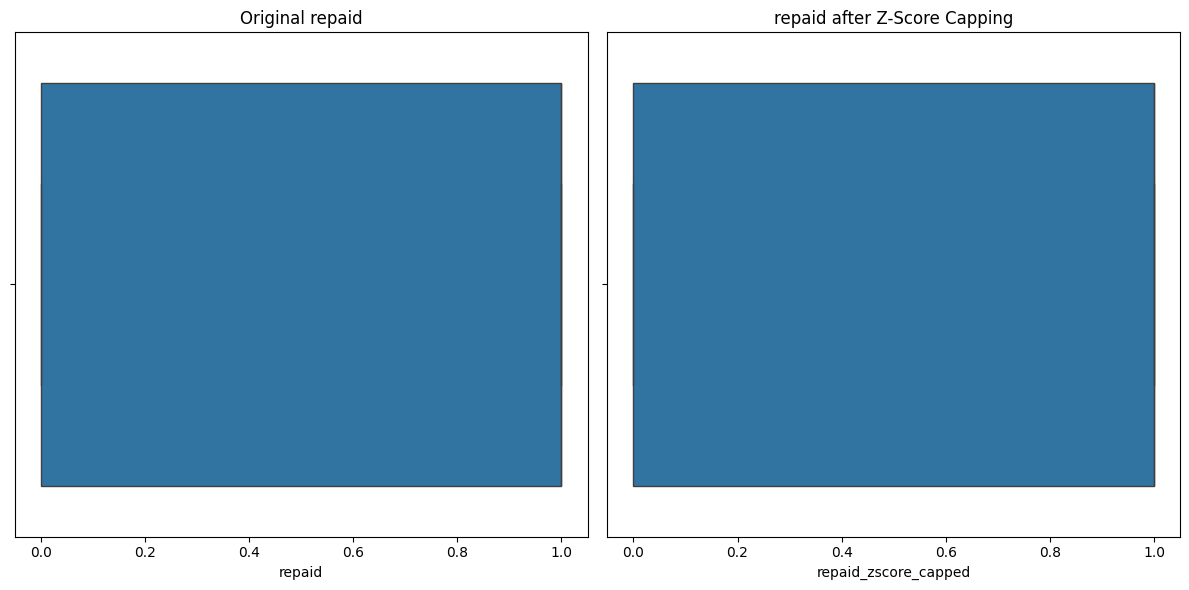

In [33]:
# Assuming df is your DataFrame
numeric_columns = ['repaid']

# Calculate z-scores
z_scores = zscore(df['repaid'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['repaid_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['repaid']), df['repaid'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['repaid'])
plt.title('Original repaid')

# Z-score capped data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore_capped['repaid_zscore_capped'])
plt.title('repaid after Z-Score Capping')

plt.tight_layout()
plt.show()

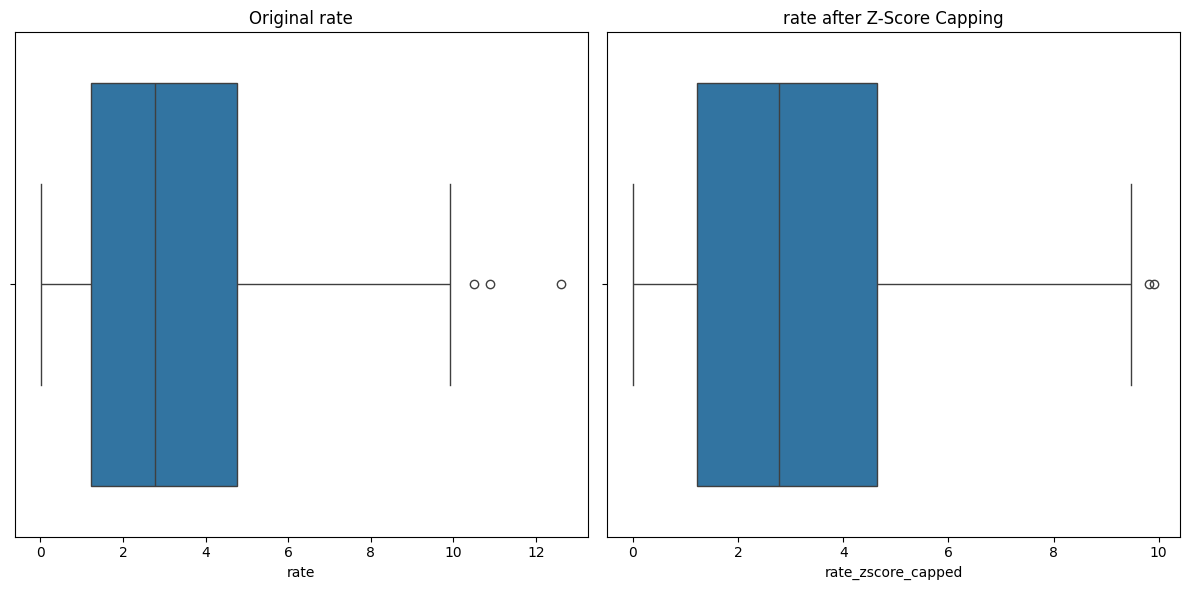

In [34]:
# Assuming df is your DataFrame
numeric_columns = ['rate']

# Calculate z-scores
z_scores = zscore(df['rate'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['rate_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['rate']), df['rate'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['rate'])
plt.title('Original rate')

# Z-score capped data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore_capped['rate_zscore_capped'])
plt.title('rate after Z-Score Capping')

plt.tight_layout()
plt.show()

### Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.

**Apply scaling using Min-Max Normalization**

In [35]:
from sklearn.preprocessing import MinMaxScaler

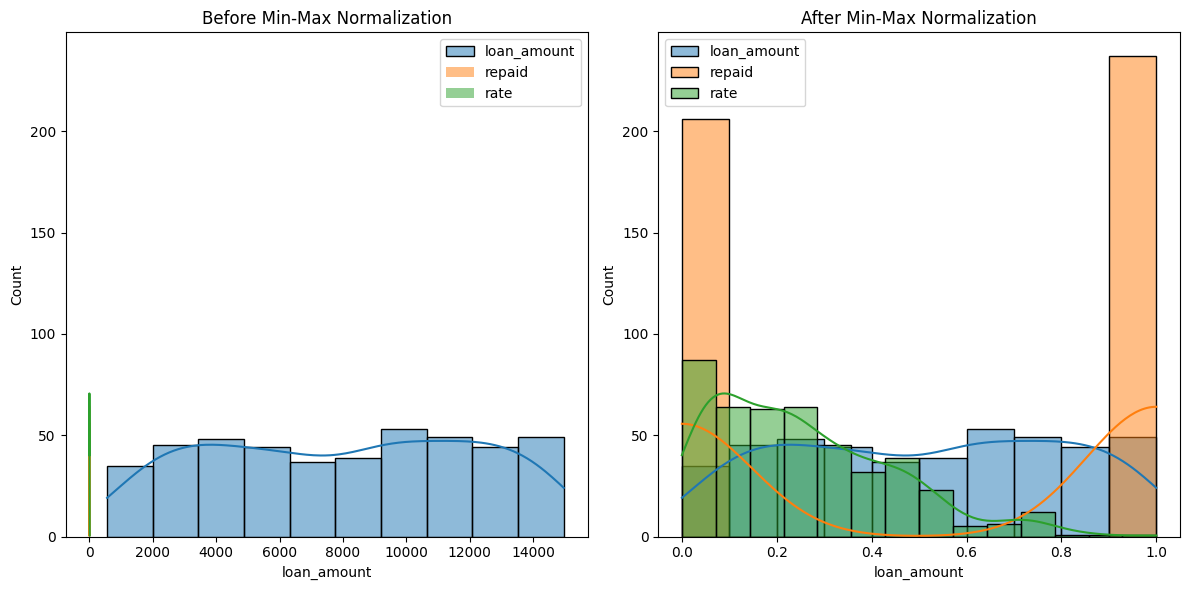

In [36]:
# Assuming df is your DataFrame
numeric_columns = ['loan_amount', 'repaid', 'rate']

# Create a copy of the DataFrame for visualization
df_normalized = df.copy()

# Apply Min-Max Normalization
scaler = MinMaxScaler()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Visualize the distributions before and after normalization
plt.figure(figsize=(12, 6))

# Before normalization
plt.subplot(1, 2, 1)
for col in numeric_columns:
    sns.histplot(df[col], kde=True, label=col, alpha=0.5)
plt.title('Before Min-Max Normalization')
plt.legend()

# After normalization
plt.subplot(1, 2, 2)
for col in numeric_columns:
    sns.histplot(df_normalized[col], kde=True, label=col, alpha=0.5)
plt.title('After Min-Max Normalization')
plt.legend()

plt.tight_layout()
plt.show()


**Display the skewness and kurtosis graphs for Loan Amount and explain the results.**

In [37]:
from scipy.stats import skew, kurtosis

Skewness of Loan Amount: -0.03997926438774986
Kurtosis of Loan Amount: -1.2317500314875274


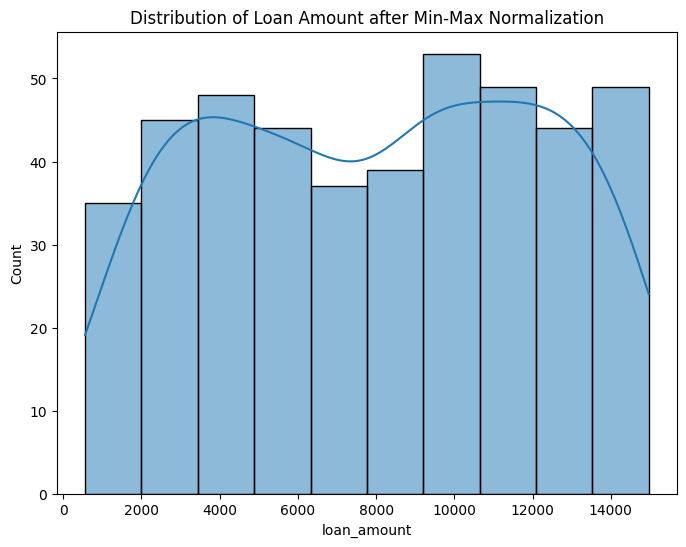

In [38]:
loan_amount_skewness = skew(df['loan_amount'])
loan_amount_kurtosis = kurtosis(df['loan_amount'])

print(f"Skewness of Loan Amount: {loan_amount_skewness}")
print(f"Kurtosis of Loan Amount: {loan_amount_kurtosis}")

# You can also visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['loan_amount'], kde=True)
plt.title('Distribution of Loan Amount after Min-Max Normalization')
plt.show()

### As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

In [39]:
# Assuming df is your DataFrame
categorical_columns = ['loan_type']

# Apply pd.get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first five rows
print(df_encoded.head())

           loan_amount  repaid  loan_id  loan_start    loan_end  rate  \
client_id                                                               
46109            13672       0    10243  2002-04-16  2003-12-20  2.15   
46109             9794       0    10984  2003-10-21  2005-07-17  1.25   
46109            12734       1    10990  2006-02-01  2007-07-05  0.68   
46109            12518       1    10596  2010-12-08  2013-05-05  1.24   
46109            14049       1    11415  2010-07-07  2012-05-21  3.13   

           loan_type_credit  loan_type_home  loan_type_other  
client_id                                                     
46109                     0               1                0  
46109                     1               0                0  
46109                     0               1                0  
46109                     0               0                0  
46109                     1               0                0  


### Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [40]:
# Assuming df is your DataFrame
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

df['loan_tenure_days'] = (df['loan_end'] - df['loan_start']).dt.days

print(df[['loan_start', 'loan_end', 'loan_tenure_days']].head())

          loan_start   loan_end  loan_tenure_days
client_id                                        
46109     2002-04-16 2003-12-20               613
46109     2003-10-21 2005-07-17               635
46109     2006-02-01 2007-07-05               519
46109     2010-12-08 2013-05-05               879
46109     2010-07-07 2012-05-21               684


### Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [41]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
features = df.drop(['loan_amount', 'loan_id', 'loan_start', 'loan_end'], axis=1)
target = df['loan_amount']

# Check the shapes of features and target
print("Features shape:", features.shape)
print("Target shape:", target.shape)

# Split the data into training and testing sets (80-20 division)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features shape: (443, 4)
Target shape: (443,)
x_train shape: (354, 4)
x_test shape: (89, 4)
y_train shape: (354,)
y_test shape: (89,)
